In [1]:
import tensorflow  as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **What is Transfer Learning**

**Surely Someone Spend Time for crafting the Right Module**

# **Why Transfer Learning**

**Leverage Existing Neural Network Data**

**Leverage Proven Network Architecture of data**

**We work on 101 food classes of 10% of data**

**It is also we can say mini Food Vision**

**Our Goal is to beat original food 101 paper with 10% of training (Leverage Power of Deep Learning)**

In [2]:
!nvidia-smi

Wed Mar  2 08:18:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Import Helper Function

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-03-02 08:18:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-02 08:18:08 (40.2 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [4]:
# Import Series of Helper Function

from helper_functions import create_tensorboard_callback, plot_loss_curves, walk_through_dir, unzip_data , compare_historys

In [5]:
# 101 Food Classes working with less data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data('101_food_classes_10_percent.zip')

--2022-03-02 08:18:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.2’

101_food_classes_10 100%[===================>]   1.51G   137MB/s    in 11s     

2022-03-02 08:18:20 (143 MB/s) - ‘101_food_classes_10_percent.zip.2’ saved [1625420029/1625420029]



**We Have Preprocess Data Using Image Modification Model File Avalible In Github**

In [6]:
# Train and Test Data

train_dir = '101_food_classes_10_percent/train'
test_dir = '101_food_classes_10_percent/test'

In [7]:
# How Many Images / Classes Are Here: 

walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/oysters'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/red_velvet_cake'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/clam_chowder'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/baklava'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/beef_carpaccio'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/hot_and_sour_soup'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/macaroni_and_cheese'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/samosa'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 im

In [8]:
#Setup Data Inputs

import tensorflow as tf
IMG_SIZE = (224,224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode = 'categorical',
                                                                                image_size= IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode= 'categorical',
                                                                image_size = IMG_SIZE,
                                                                shuffle = False)


Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


# **Outlining The Model**

**Here Are The Steps Where are going to take:**

**Create Model checkpoint callback**

**Create Data Augmentation Layer to build data augmentation right into the model**

**Build A headlines (No to top Layer) Functional . Efficient Net B0 Backboned -Model (We'll Create our own output layer)**

**Compile the model**

**Feature Extraction for 5 Full Epochs**

In [9]:
# Create Checkpoint callbacks

checkpoint_path = '101_food_classes_10_percent_data_model_checkpoint'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only = True,
                                                         monitor ='val_accuracy',
                                                         save_best_only = True)



# **Data Augmentation Layer**



In [10]:
#Create Data Augmentation layer

from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential


In [11]:
# Setup Data Augmentation

data_augmentation = Sequential([
                                preprocessing.RandomFlip('horizontal'),
                                preprocessing.RandomRotation(0.2),
                                preprocessing.RandomHeight(0.2),
                                preprocessing.RandomWidth(0.2),
                                preprocessing.RandomZoom(0.2),
                                # preprocessing.Rescaling(1./255)  FOR RESNET 50 V2
], name = 'data_augmentation')



# **Create Headless Efficient Net B0**



In [12]:
#Setup Base Model & Freeze it layers

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup Model Architecture With Trainable Top layers

inputs = layers.Input(shape=(224,224,3), name = 'input_layer')

x = data_augmentation(inputs) # Augment Layer

x = base_model(x, training = False)
x= layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer') (x)

outputs = layers.Dense(len(train_data_all_10_percent.class_names),
                       activation = 'softmax',
                       name = 'output_layer') (x)

model = tf.keras.Model(inputs, outputs)
                       


# **Fitting & Evaluating Our Biggest Model**

In [13]:
# Compile The Model

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit The Model

history_class_10_percent = model.fit(train_data_all_10_percent,
                                     epochs =5,
                                     validation_data = test_data,
                                     validation_steps = int(0.15 * len(test_data)),
                                     callbacks = [checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 129s 500ms/step - loss: 3.4688 - accuracy: 0.2426 - val_loss: 2.6671 - val_accuracy: 0.4108
Epoch 2/5
237/237 [==============================] - 98s 411ms/step - loss: 2.3381 - accuracy: 0.4690 - val_loss: 2.2261 - val_accuracy: 0.4642
Epoch 3/5
237/237 [==============================] - 88s 370ms/step - loss: 1.9741 - accuracy: 0.5328 - val_loss: 2.0327 - val_accuracy: 0.5037
Epoch 4/5
237/237 [==============================] - 81s 340ms/step - loss: 1.7610 - accuracy: 0.5762 - val_loss: 1.9683 - val_accuracy: 0.5050
Epoch 5/5
237/237 [==============================] - 76s 320ms/step - loss: 1.6037 - accuracy: 0.6051 - val_loss: 1.8980 - val_accuracy: 0.5191


**Wow! We Just Beat Food 101 Dataset Paper**

In [14]:
# Evaluate The Model 

feature_extraction_result = model.evaluate(test_data)
feature_extraction_result

790/790 [==============================] - 106s 134ms/step - loss: 1.7033 - accuracy: 0.5583


[1.7032781839370728, 0.5582970380783081]

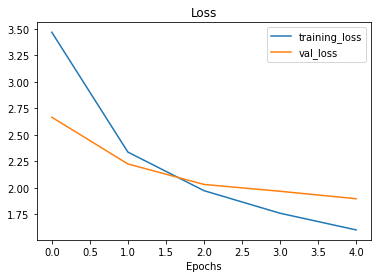

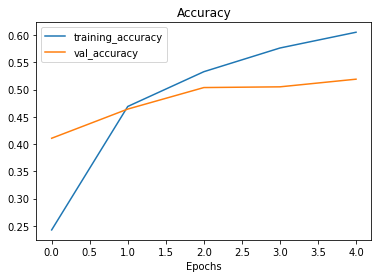

In [15]:
# Plot Loss Curves

plot_loss_curves(history_class_10_percent)

# **Unfreezing Some Layer To Our Base Model**

In [16]:
# Fine Tuning 
# Unfreeze All Layer to the base model

base_model.trainable = True

# Refreeze Every Layer Except The Last 5

for layer in base_model.layers[:-5]:
  layer.trainable = False

#Recompile Model With Lower Learning Rate

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [17]:
# What Layers in Model Are trainable?

for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_average_pooling_layer True
output_layer True


In [18]:
# Check Which Layer Are Trainable In our Base Model

for layer_number, layer in enumerate(model.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

# **Fine Tune For 5 Epochs**

In [19]:
fine_tune_epochs = 10

# Fine Tune Our Model

history_class_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                               epochs = fine_tune_epochs,
                                               validation_data= test_data,
                                               validation_steps = int(0.15 * len(test_data)),
                                               initial_epoch = history_class_10_percent.epoch[-1])

Epoch 5/10
237/237 [==============================] - 87s 331ms/step - loss: 1.3569 - accuracy: 0.6506 - val_loss: 1.9517 - val_accuracy: 0.4995
Epoch 6/10
237/237 [==============================] - 73s 306ms/step - loss: 1.2439 - accuracy: 0.6717 - val_loss: 1.8811 - val_accuracy: 0.5146
Epoch 7/10
237/237 [==============================] - 71s 297ms/step - loss: 1.1592 - accuracy: 0.6928 - val_loss: 1.8735 - val_accuracy: 0.5111
Epoch 8/10
237/237 [==============================] - 70s 294ms/step - loss: 1.0831 - accuracy: 0.7166 - val_loss: 1.9142 - val_accuracy: 0.5180
Epoch 9/10
237/237 [==============================] - 69s 289ms/step - loss: 1.0164 - accuracy: 0.7358 - val_loss: 1.9040 - val_accuracy: 0.5188
Epoch 10/10
237/237 [==============================] - 66s 276ms/step - loss: 0.9632 - accuracy: 0.7447 - val_loss: 1.9269 - val_accuracy: 0.5011


In [20]:
# Evaluate The  Whole Test Data

all_classes_10_percent_fine_tune_results = model.evaluate(test_data)
all_classes_10_percent_fine_tune_results

790/790 [==============================] - 105s 133ms/step - loss: 1.6023 - accuracy: 0.5762


[1.602321743965149, 0.5761980414390564]

# **Compare the histories of Feature Extraction Model With Fine Tuning Model**

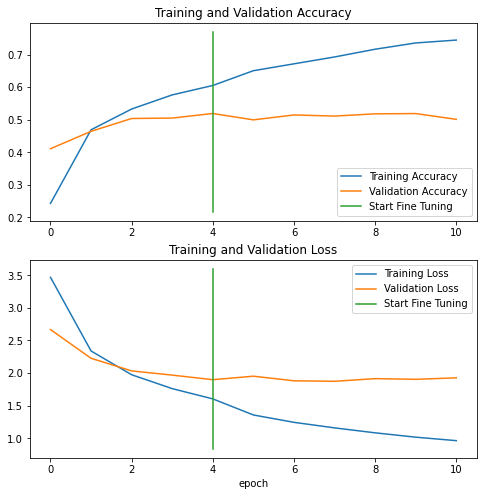

In [21]:
compare_historys( history_class_10_percent,
                 history_class_10_percent_fine_tune,
                 initial_epochs = 5)

# **Saving & Loading Our Trained Model**

**To Use Our Model in External application, We need to save it and export it in somewhere**

In [22]:
model.save('compare_history')

INFO:tensorflow:Assets written to: compare_history/assets


In [23]:
# load an Evaluate Saved Model

loaded_model = tf.keras.models.load_model('compare_history')

**Evaluate Loaded Model and Compare Performance to pretrained saved model**

In [24]:
loaded_model_results  = loaded_model.evaluate(test_data)
loaded_model_results

790/790 [==============================] - 108s 135ms/step - loss: 1.6023 - accuracy: 0.5762


[1.602321743965149, 0.5761980414390564]

In [25]:
all_classes_10_percent_fine_tune_results

[1.602321743965149, 0.5761980414390564]

# **Downloading Pretrained Model**

In [26]:
# Evaluating Performance Of Big Dog Model Accross all Different classes

import tensorflow as tf

#Download Pretrained Model 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
saved_model_path = "06_101_food_class_10_percent_saved_big_dog_model.zip"
unzip_data(saved_model_path)

--2022-03-02 08:43:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip.1’

06_101_food_class_1 100%[===================>]  44.59M  75.0MB/s    in 0.6s    

2022-03-02 08:43:46 (75.0 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip.1’ saved [46760742/46760742]



In [27]:
# Load In Saved Model

model = tf.keras.models.load_model('06_101_food_class_10_percent_saved_big_dog_model')

In [28]:
# Evaluate Loaded Model (The One We Downloaded on Test Data)

result_downloaded_model = model.evaluate(test_data)
result_downloaded_model

790/790 [==============================] - 108s 134ms/step - loss: 1.8027 - accuracy: 0.6078


[1.8027207851409912, 0.6077623963356018]

# **Make Prediction Trained Model**

In [29]:
# Make Predictions With Model

preds_probs = model.predict(test_data,
                            verbose =1) # Set Verbose to see how long is left

len(test_data)                            

790/790 [==============================] - 101s 126ms/step


790

In [30]:
# How Many Predictions Are there ?
len(preds_probs)

25250

In [31]:
# What the Shape of Our Predictions

preds_probs.shape

(25250, 101)

In [32]:
# Lets See What First 10 Predicts looks Like:

preds_probs[:10]

array([[5.9541941e-02, 3.5742332e-06, 4.1376889e-02, ..., 1.4138899e-09,
        8.3530460e-05, 3.0897565e-03],
       [9.6401680e-01, 1.3753089e-09, 8.4779976e-04, ..., 5.4286684e-05,
        7.8363253e-12, 9.8467334e-10],
       [9.5925868e-01, 3.2534019e-05, 1.4867033e-03, ..., 7.1891884e-07,
        5.4398350e-07, 4.0276311e-05],
       ...,
       [4.7313324e-01, 1.2931301e-07, 1.4805583e-03, ..., 5.9749611e-04,
        6.6969820e-05, 2.3469329e-05],
       [4.4571780e-02, 4.7265351e-07, 1.2258515e-01, ..., 6.3498578e-06,
        7.5319103e-06, 3.6778715e-03],
       [7.2438985e-01, 1.9249777e-09, 5.2310857e-05, ..., 1.2291447e-03,
        1.5793171e-09, 9.6395503e-05]], dtype=float32)

In [33]:
# What Does First Prediction Probability Look like:

preds_probs[0]

array([5.9541941e-02, 3.5742332e-06, 4.1376889e-02, 1.0660903e-09,
       8.1613996e-09, 8.6639682e-09, 8.0926134e-07, 8.5652442e-07,
       1.9858850e-05, 8.0977554e-07, 3.1727692e-09, 9.8673388e-07,
       2.8532100e-04, 7.8049661e-10, 7.4230990e-04, 3.8915794e-05,
       6.4740016e-06, 2.4977169e-06, 3.7891397e-05, 2.0678806e-07,
       1.5538471e-05, 8.1506892e-07, 2.6230925e-06, 2.0010653e-07,
       8.3827712e-07, 5.4215743e-06, 3.7391112e-06, 1.3150788e-08,
       2.7761345e-03, 2.8051816e-05, 6.8561651e-10, 2.5574524e-05,
       1.6688934e-04, 7.6409645e-10, 4.0452869e-04, 1.3150487e-08,
       1.7957433e-06, 1.4448400e-06, 2.3062853e-02, 8.2465459e-07,
       8.5366531e-07, 1.7138503e-06, 7.0526130e-06, 1.8402382e-08,
       2.8553984e-07, 7.9482870e-06, 2.0682012e-06, 1.8525193e-07,
       3.3619781e-08, 3.1522335e-04, 1.0410886e-05, 8.5448306e-07,
       8.4741890e-01, 1.0555387e-05, 4.4094719e-07, 3.7404192e-05,
       3.5306137e-05, 3.2489079e-05, 6.7313988e-05, 1.2852399e

In [34]:
len(preds_probs[0]),


(101,)

In [35]:
sum(preds_probs[0])

1.0000000616546507

In [36]:
# Our Model Outputs a Prediction Probability Array (with Number of Variable When N is Number of Classes)  for Each Samples With pass Through Predicted Model


print(f"Number Of Prediction Probabilities for sample 0 : {len(preds_probs[0])}")

Number Of Prediction Probabilities for sample 0 : 101


In [37]:
print(f"Number Of Predictions Probabilities Sample 0 Look like :\n {preds_probs[0]}")

Number Of Predictions Probabilities Sample 0 Look like :
 [5.9541941e-02 3.5742332e-06 4.1376889e-02 1.0660903e-09 8.1613996e-09
 8.6639682e-09 8.0926134e-07 8.5652442e-07 1.9858850e-05 8.0977554e-07
 3.1727692e-09 9.8673388e-07 2.8532100e-04 7.8049661e-10 7.4230990e-04
 3.8915794e-05 6.4740016e-06 2.4977169e-06 3.7891397e-05 2.0678806e-07
 1.5538471e-05 8.1506892e-07 2.6230925e-06 2.0010653e-07 8.3827712e-07
 5.4215743e-06 3.7391112e-06 1.3150788e-08 2.7761345e-03 2.8051816e-05
 6.8561651e-10 2.5574524e-05 1.6688934e-04 7.6409645e-10 4.0452869e-04
 1.3150487e-08 1.7957433e-06 1.4448400e-06 2.3062853e-02 8.2465459e-07
 8.5366531e-07 1.7138503e-06 7.0526130e-06 1.8402382e-08 2.8553984e-07
 7.9482870e-06 2.0682012e-06 1.8525193e-07 3.3619781e-08 3.1522335e-04
 1.0410886e-05 8.5448306e-07 8.4741890e-01 1.0555387e-05 4.4094719e-07
 3.7404192e-05 3.5306137e-05 3.2489079e-05 6.7313988e-05 1.2852399e-08
 2.6220215e-10 1.0318094e-05 8.5742751e-05 1.0569768e-06 2.1293156e-06
 3.7636986e-05 7.59

In [38]:
print(f"The class with the highest predicted probability by the model for sample 0: {preds_probs[0].argmax()}")

The class with the highest predicted probability by the model for sample 0: 52


In [39]:
test_data.class_names[52]

'gyoza'

In [40]:
# Get The Pred Classes of Each Label

pred_classes = preds_probs.argmax(axis=1)

In [41]:
# How Do They Look

pred_classes[:10]

array([52,  0,  0, 80, 79, 61, 29,  0, 85,  0])

In [42]:
# How Many Predictios Classes Do We Have? 
len(pred_classes)

25250

# **UnRavelling Our test Datasets**

**Now , We Have Got predictions array of all of our model's predictions to evaluate them**



In [43]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

**To Get Our Test Labels , We Need To Unravel Our Test Data BatchDataSet**

In [44]:
y_labels=[]

for images , labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10] # Look at First 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [45]:
# How Many Y_labels Are There?

len(y_labels)

25250

**When Shuffle = TRUE, It would be Shuffle Everytime whenever we unravel the test dataset**

# **Confirming Model Predictiions**

In [46]:
#Evaluating Our Model Predictions

result_downloaded_model

[1.8027207851409912, 0.6077623963356018]

In [47]:
#Lets Try Scikit Learn Accuracy Score Function

from sklearn.metrics import accuracy_score

In [48]:
sklearn_accuracy = accuracy_score(y_true= y_labels,
                                  y_pred = pred_classes)

sklearn_accuracy

0.6077623762376237

In [49]:
# Does This Metric Come Close to our model's Evaluate Results

import numpy as np
np.isclose(result_downloaded_model[1], sklearn_accuracy)

True

# **Creating Confusion Matrix 101**

In [50]:
# Lets Get Visual : Making a Confusion Matrix

from helper_functions import make_confusion_matrix

In [51]:
class_names = test_data.class_names

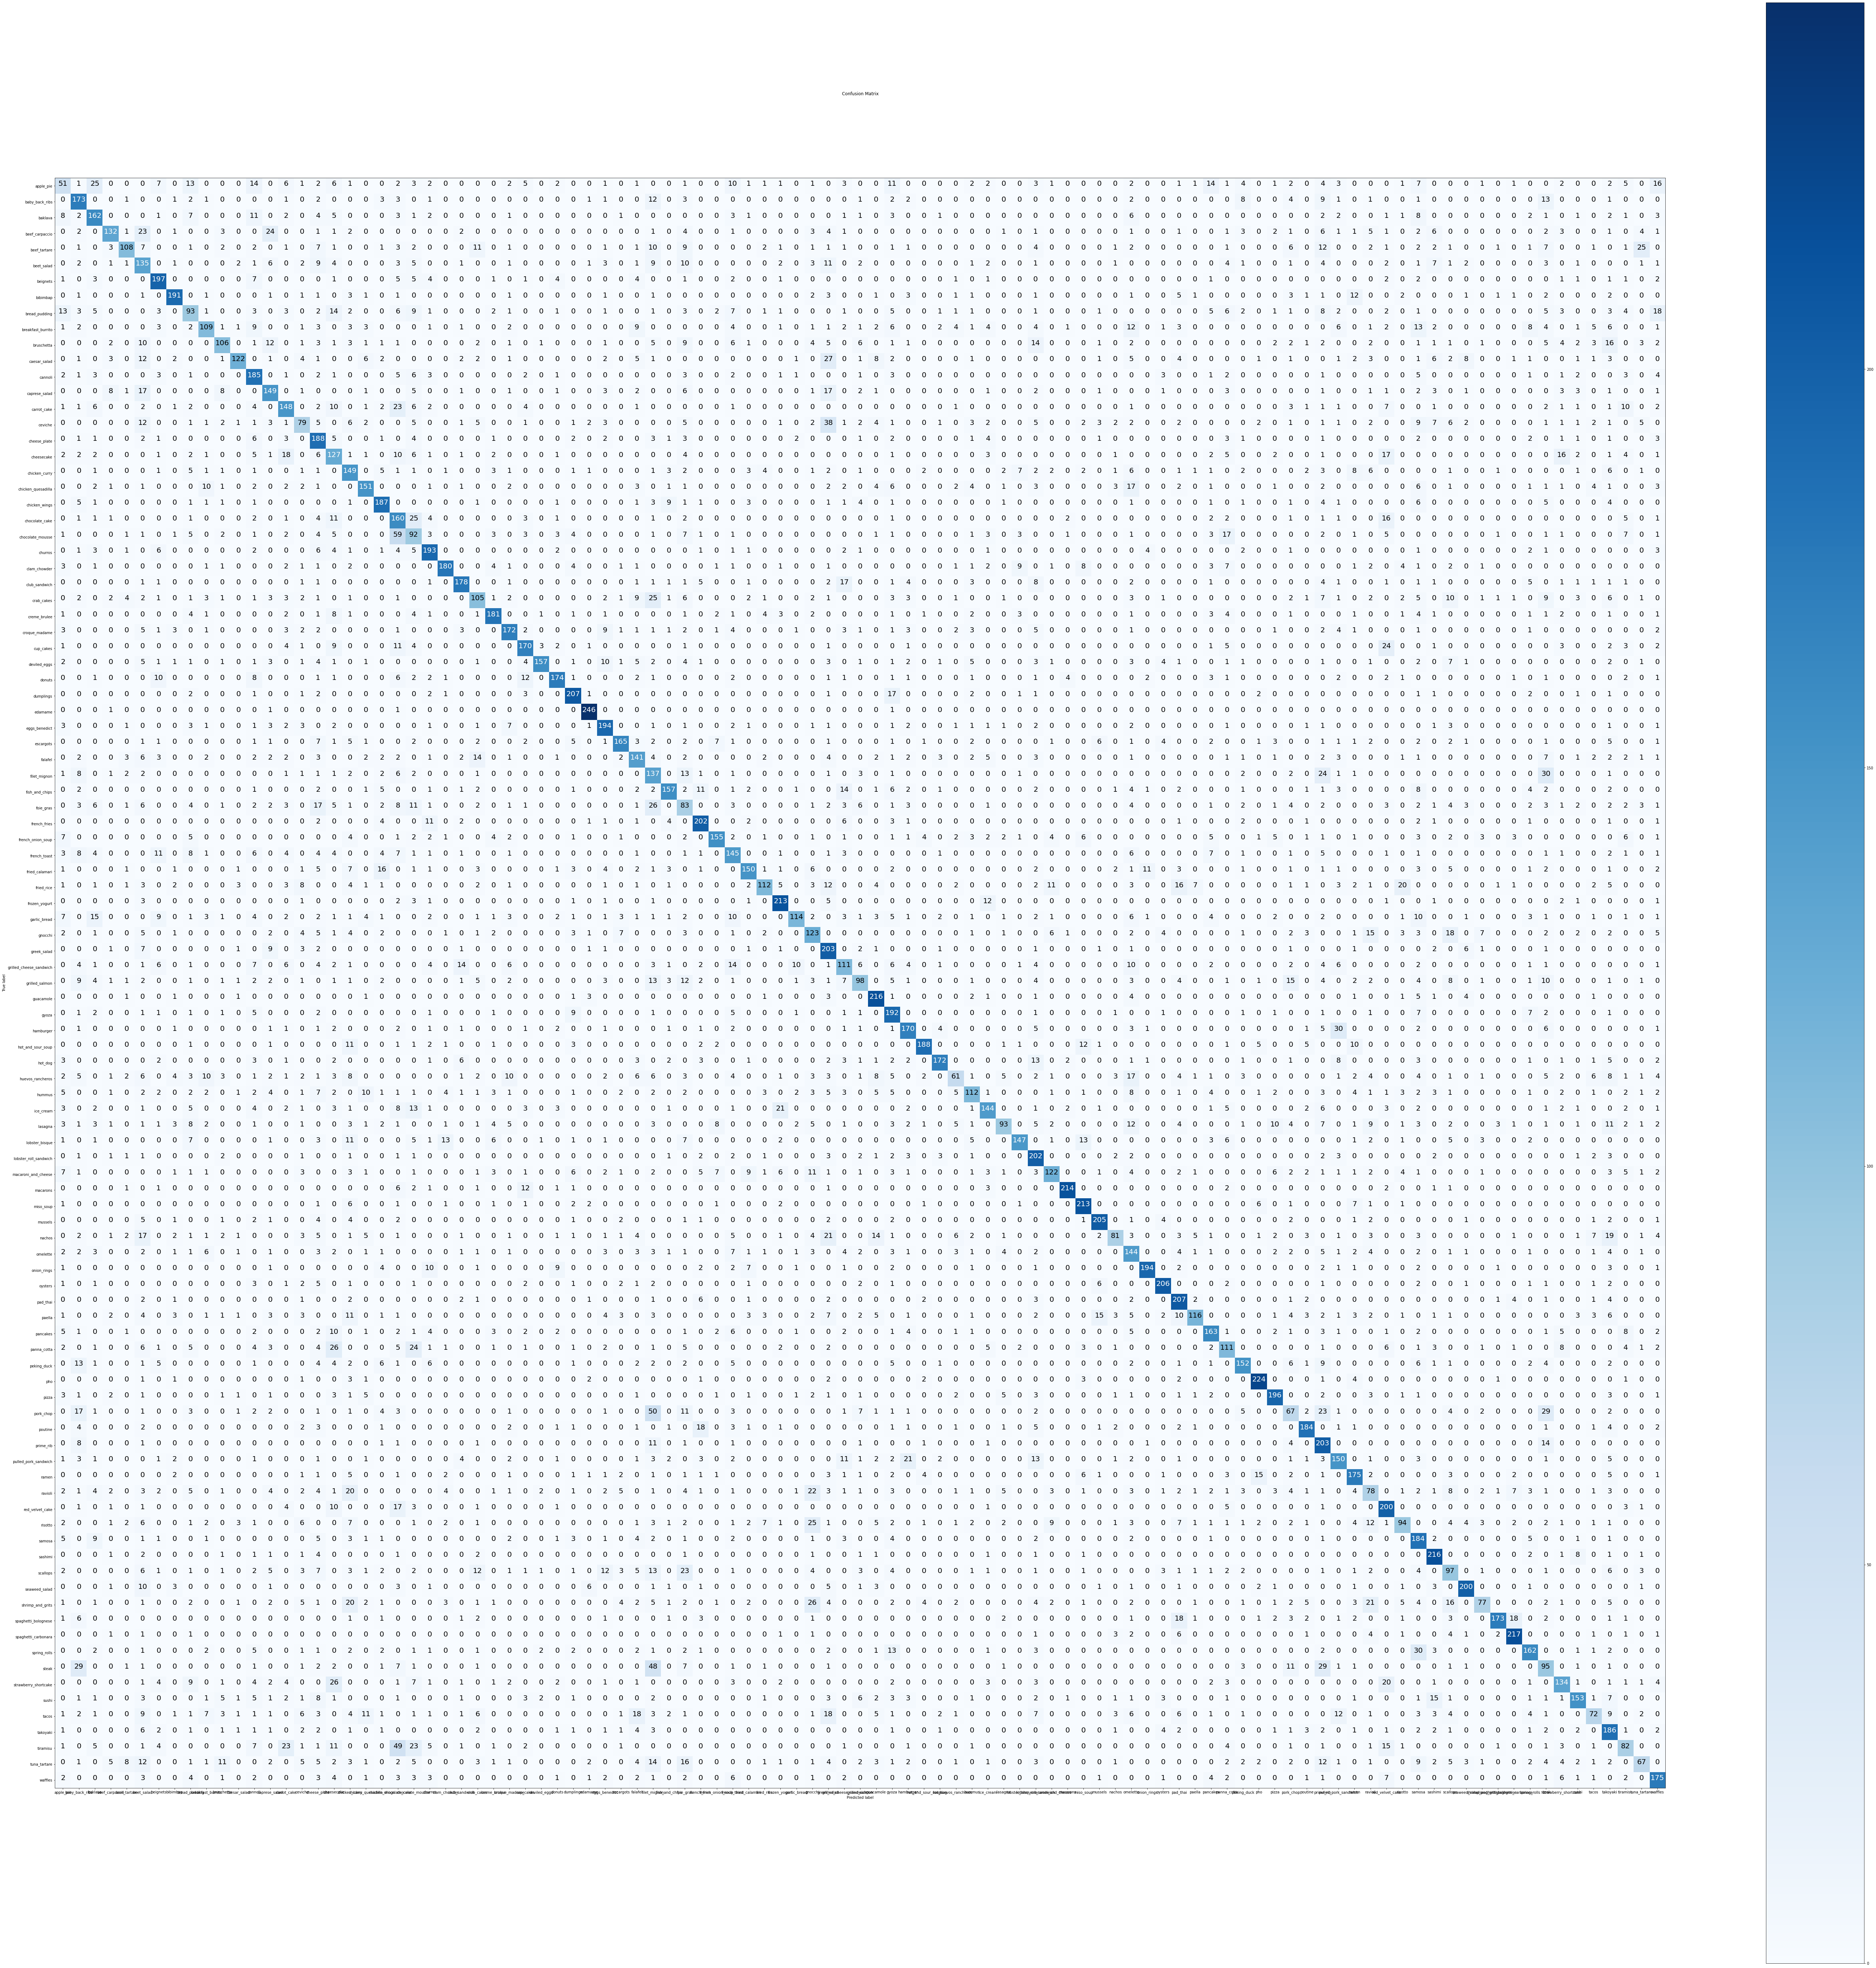

In [52]:
make_confusion_matrix(y_true = y_labels,
                      y_pred = pred_classes,
                      classes = class_names,
                      figsize= (100,100),
                      text_size=20,
                      savefig = True)

In [53]:
# We Need To Make Some Changes on Confusion Matrix

import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  # Changed (Plot X Label Vertically)

  plt.xticks(rotation=70, fontsize= text_size)
  plt.yticks(fontsize= text_size)



  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
      
   # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")


# **Evaluating Every Indiviual Class**

**Time For Classification Report**

**Scikit Learn Has a Helpful Function for Acquiring many different Classifications per metrics per classes( e.g : Precision, Recall, F1) Called Classification Report**



In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_labels,
                            y_pred = pred_classes))

# The Number Above give a Great Class By Class Evaluation of our model's predictions

# Get A Dictionery Classification Models

classification_report_dict = classification_report(y_labels,pred_classes,output_dict= True)

classification_report_dict

              precision    recall  f1-score   support

           0       0.29      0.20      0.24       250
           1       0.51      0.69      0.59       250
           2       0.56      0.65      0.60       250
           3       0.74      0.53      0.62       250
           4       0.73      0.43      0.54       250
           5       0.34      0.54      0.42       250
           6       0.67      0.79      0.72       250
           7       0.82      0.76      0.79       250
           8       0.40      0.37      0.39       250
           9       0.62      0.44      0.51       250
          10       0.62      0.42      0.50       250
          11       0.84      0.49      0.62       250
          12       0.52      0.74      0.61       250
          13       0.56      0.60      0.58       250
          14       0.56      0.59      0.57       250
          15       0.44      0.32      0.37       250
          16       0.45      0.75      0.57       250
          17       0.37    

{'0': {'f1-score': 0.24056603773584903,
  'precision': 0.29310344827586204,
  'recall': 0.204,
  'support': 250},
 '1': {'f1-score': 0.5864406779661017,
  'precision': 0.5088235294117647,
  'recall': 0.692,
  'support': 250},
 '10': {'f1-score': 0.5047619047619047,
  'precision': 0.6235294117647059,
  'recall': 0.424,
  'support': 250},
 '100': {'f1-score': 0.641025641025641,
  'precision': 0.5912162162162162,
  'recall': 0.7,
  'support': 250},
 '11': {'f1-score': 0.6161616161616161,
  'precision': 0.8356164383561644,
  'recall': 0.488,
  'support': 250},
 '12': {'f1-score': 0.6105610561056106,
  'precision': 0.5196629213483146,
  'recall': 0.74,
  'support': 250},
 '13': {'f1-score': 0.5775193798449612,
  'precision': 0.5601503759398496,
  'recall': 0.596,
  'support': 250},
 '14': {'f1-score': 0.574757281553398,
  'precision': 0.5584905660377358,
  'recall': 0.592,
  'support': 250},
 '15': {'f1-score': 0.36744186046511623,
  'precision': 0.4388888888888889,
  'recall': 0.316,
  'su

In [55]:
# lets Plot all of Our Classes F1-Score

In [56]:
# Create Empty Dictionery

classes_f1_score =  {}

# Loop Through Classification Report Dictionery Items

for k,v in classification_report_dict.items():
  if k == 'accuracy':     # Steps Once We Get to accurate Key       
        break;
  else:
    # Add Class Names and F1-Score to New Dictionery 
    classes_f1_score[class_names[int(k)]] = v['f1-score']    

classes_f1_score

{'apple_pie': 0.24056603773584903,
 'baby_back_ribs': 0.5864406779661017,
 'baklava': 0.6022304832713754,
 'beef_carpaccio': 0.616822429906542,
 'beef_tartare': 0.544080604534005,
 'beet_salad': 0.41860465116279066,
 'beignets': 0.7229357798165138,
 'bibimbap': 0.7908902691511386,
 'bread_pudding': 0.3866943866943867,
 'breakfast_burrito': 0.5117370892018779,
 'bruschetta': 0.5047619047619047,
 'caesar_salad': 0.6161616161616161,
 'cannoli': 0.6105610561056106,
 'caprese_salad': 0.5775193798449612,
 'carrot_cake': 0.574757281553398,
 'ceviche': 0.36744186046511623,
 'cheese_plate': 0.5654135338345864,
 'cheesecake': 0.42546063651591287,
 'chicken_curry': 0.5008403361344538,
 'chicken_quesadilla': 0.6411889596602972,
 'chicken_wings': 0.7123809523809523,
 'chocolate_cake': 0.45261669024045265,
 'chocolate_mousse': 0.3291592128801431,
 'churros': 0.7134935304990757,
 'clam_chowder': 0.7708779443254817,
 'club_sandwich': 0.734020618556701,
 'crab_cakes': 0.4625550660792952,
 'creme_brulee

In [57]:
# Turn F1-Scores into DataFrames


import pandas as pd

f1_scores = pd.DataFrame({"class_names": list(classes_f1_score.keys()),
                          'f1-score': list(classes_f1_score.values())}).sort_values("f1-score", ascending=False)

f1_scores                          

,class_names,f1-score
33,edamame,0.937143
63,macarons,0.895397
75,pho,0.866538
91,spaghetti_carbonara,0.847656
69,oysters,0.834008
...,...,...
56,huevos_rancheros,0.339833
22,chocolate_mousse,0.329159
77,pork_chop,0.308756
39,foie_gras,0.297491


# **Plotting Model's F1-Score for Indiviual Class**

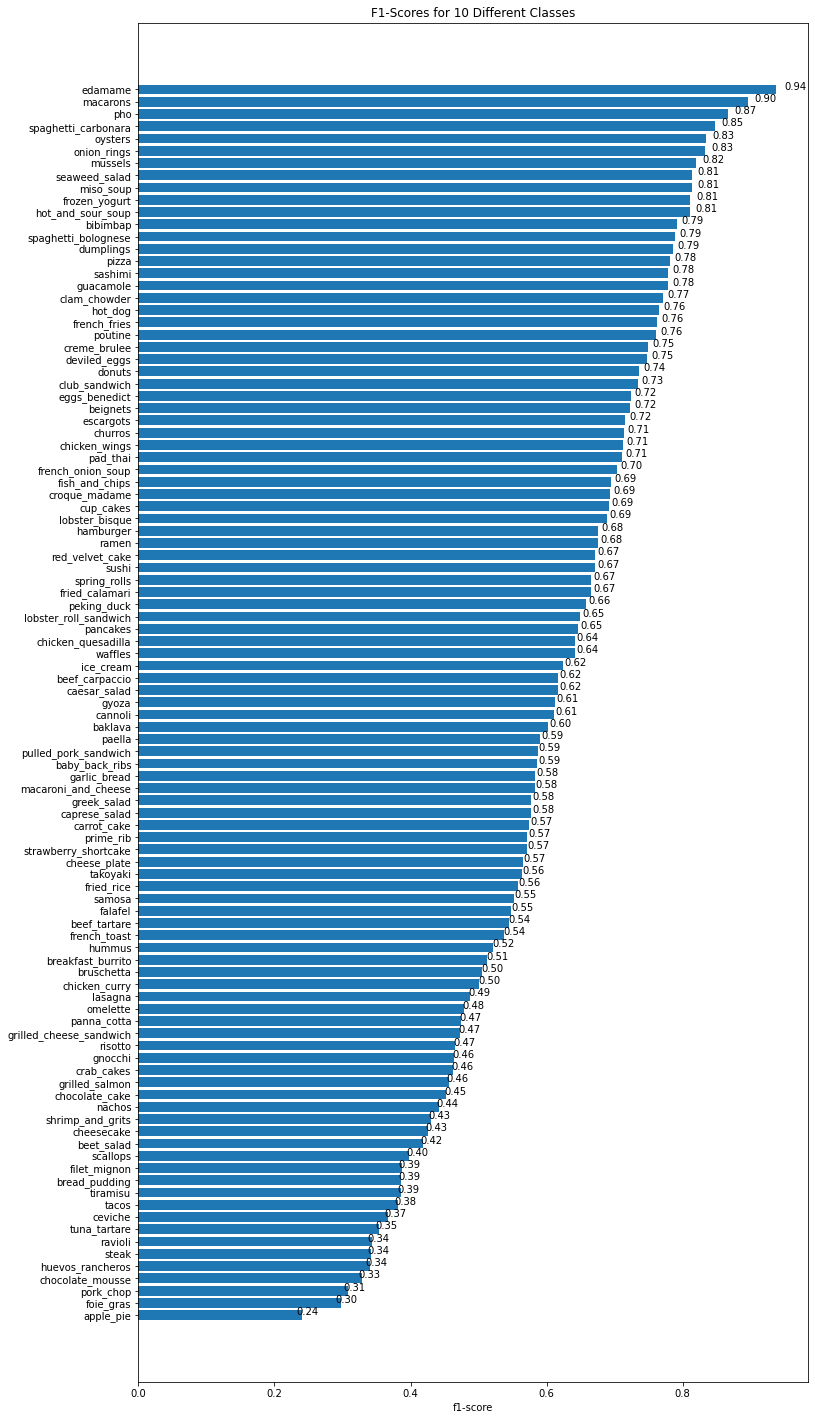

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_names"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

# **Create Function of Load and Prepare Images**

In [59]:
# Visually Predictions on test images

**Now This is the Real Test how does model go on food images not in training test**

**To Visualize our model prediction of our images, we'll need A function to load and preprocess images . Specially It will be Need to:**

**1- Read om a Target Images file Path Using tf.io.read_file()**

**2- Turn the images into tensor using tf.io.decode_image()**

**3- Resize The image Tensor into same sizes as the images of our model has trained using tf.image.resize()**

**4- Scale The image to get all of the pixel value Between 0 and 1 (If Neccessary)**

In [60]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img
      




# **Make Predictions On Test Images**

**Now We Write some code to visualize images , their target labels and our model's predictions**

**Specifically, We'll write some code to :**

**1- Load a Few random images from test dataset**

**2- Make Predictions on loaded images**

**3- Plot Original images along with model's predictions probability and truth table**

In [62]:
# # Make preds on a series of random images
# import os
# import random

# plt.figure(figsize=(17, 10))
# for i in range(3):
#   # Choose a random image from a random class 
#   class_name = random.choice(class_names)
#   filename = random.choice(os.listdir(test_dir + "/" + class_name))
#   filepath = test_dir + class_name + "/" + filename

#   # Load the image and make predictions
#   img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
#   pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
#   pred_class = class_names[pred_prob.argmax()] # find the predicted class 

#   # Plot the image(s)
#   plt.subplot(1, 3, i+1)
#   plt.imshow(img/255.)
#   if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
#     title_color = "g"
#   else:
#     title_color = "r"
#   plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
#   plt.axis(False);


# **Finding Model's Most Wrong Predictions**

**A Good way to inspect Your Model's Performances  is to view the wrong predictions**

**To Find Out where our model is most wrong, lets write some code:**

**1- Get All of the images file path in the test dataset using list_files() method**

**2- Create Pandas DataFrame of the images filepaths ground truth labels, predicted classes, max predictions probabilities**

**3- Use our dataFrame to find all the wrong predictions**

**4-  Sort The dataFrame based on Wrong predictions**

**5- Visualize the images with highest Predictions probabilities but have wrong predictions**

# **Write Code to uncover Most Wrong Predictions**

In [63]:
# 1-  Get all of the images path

filepaths = []

for filepath in test_data.list_files(
    '/content/101_food_classes_10_percent/test/*/*.jpg',
    shuffle=False):
  
  filepaths.append(filepath.numpy())

filepaths[:10]

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [64]:
# 2- Create DataFrame of Different Parameters 

import pandas as pd
pred_df = pd.DataFrame({'img_path': filepaths,
                        'y_true': y_labels,
                        'y_pred': pred_classes,
                        'pred_conf': preds_probs.max(axis=1),
                        'y_true_classname': [class_names[i] for i in y_labels],
                        'y_pred_classname': [class_names[i] for i in pred_classes]})

In [65]:
# 3- Find put in our dataFrame which predictions are wrong

pred_df['pred_correct'] = pred_df['y_true'] == pred_df['y_pred']

pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'/content/101_food_classes_10_percent/test/ap...,0,52,0.847419,apple_pie,gyoza,False
1,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.964017,apple_pie,apple_pie,True
2,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.959259,apple_pie,apple_pie,True
3,b'/content/101_food_classes_10_percent/test/ap...,0,80,0.658607,apple_pie,pulled_pork_sandwich,False
4,b'/content/101_food_classes_10_percent/test/ap...,0,79,0.367902,apple_pie,prime_rib,False


In [66]:
# 4- Sort Our dataFrame to have most wrong predictions

top_100_wrong = pred_df[pred_df['pred_correct']== False].sort_values('pred_conf', ascending = False)[:100]

top_100_wrong.head(20)

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
21810,b'/content/101_food_classes_10_percent/test/sc...,87,29,0.999997,scallops,cup_cakes,False
231,b'/content/101_food_classes_10_percent/test/ap...,0,100,0.999995,apple_pie,waffles,False
15359,b'/content/101_food_classes_10_percent/test/lo...,61,53,0.999988,lobster_roll_sandwich,hamburger,False
23539,b'/content/101_food_classes_10_percent/test/st...,94,83,0.999987,strawberry_shortcake,red_velvet_cake,False
21400,b'/content/101_food_classes_10_percent/test/sa...,85,92,0.999981,samosa,spring_rolls,False
24540,b'/content/101_food_classes_10_percent/test/ti...,98,83,0.999947,tiramisu,red_velvet_cake,False
2511,b'/content/101_food_classes_10_percent/test/br...,10,61,0.999945,bruschetta,lobster_roll_sandwich,False
5574,b'/content/101_food_classes_10_percent/test/ch...,22,21,0.999939,chocolate_mousse,chocolate_cake,False
17855,b'/content/101_food_classes_10_percent/test/pa...,71,65,0.999931,paella,mussels,False
23797,b'/content/101_food_classes_10_percent/test/su...,95,86,0.999904,sushi,sashimi,False


# **Plotting and Visulizing The Samples**

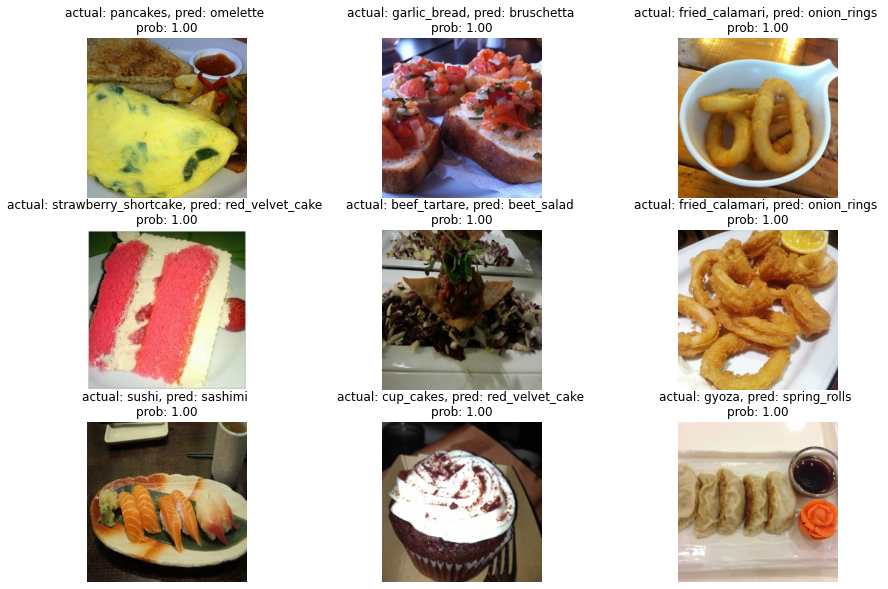

In [67]:
# 5. Visualize some of the most wrong examples
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()): 
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)

# **Making Predictions and Plotting our Own Custom Datasets**

In [68]:
# Test Out Big Dog in Model on our Custom Images

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

unzip_data('custom_food_images.zip')

--2022-03-02 08:51:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip.1’

custom_food_images. 100%[===================>]  12.58M  31.0MB/s    in 0.4s    

2022-03-02 08:51:38 (31.0 MB/s) - ‘custom_food_images.zip.1’ saved [13192985/13192985]



In [69]:
# Get The Custom Food Images FilePaths

custom_food_images = ['custom_food_images/' + img_path for img_path in os.listdir('custom_food_images')]

custom_food_images

['custom_food_images/sushi.jpeg',
 'custom_food_images/ramen.jpeg',
 'custom_food_images/steak.jpeg',
 'custom_food_images/chicken_wings.jpeg',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/pizza-dad.jpeg']

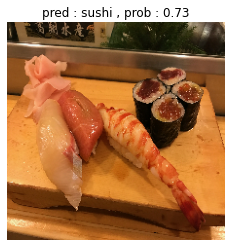

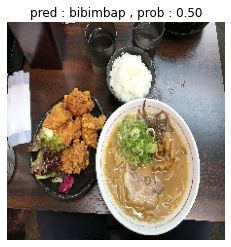

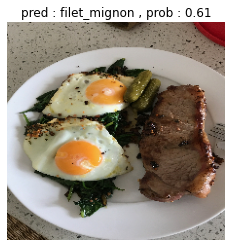

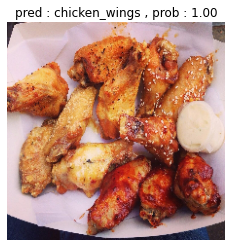

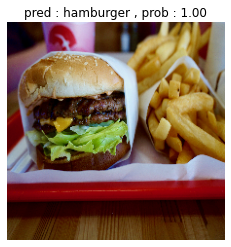

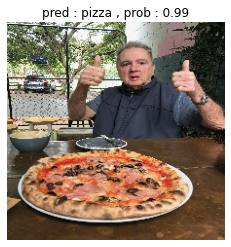

In [70]:
# Make Predictions on and Plot Custom Food Images

for img in custom_food_images:

  img = load_and_prep_image(img, scale=False)

  pred_prob = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[pred_prob.argmax()]

  # Plot the Appropiate Information

  plt.figure()

  plt.imshow(img/255.)
  plt.title(f"pred : {pred_class} , prob : {pred_prob.max():.2f}")
  plt.axis(False);

# **This Is End of Transfer Learning Scaling Up**